In [3]:
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(tidyr)
library(readr)
library(stringr)
library(ggbeeswarm)
options(scipen = 999)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
options(repr.plot.width=8, repr.plot.height=6)

In [5]:
p = ggplot() + 
    theme_light() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1),axis.title.x = element_blank(), axis.title.y = element_text(colour = "gray30", size = 9)) +
    theme(legend.direction = "horizontal", legend.position = "top", legend.title = element_blank(), legend.text = element_text(colour = "gray30", size = 9)) +
    theme(axis.text.x = element_text(angle = 90, vjust=0.5, hjust=1)) +
    theme(panel.grid.minor.x = element_blank(), panel.grid.major.x = element_blank())

In [10]:
df = read.csv('data_agg.csv')

In [11]:
df2 = df %>% filter(benchmark != 'Covariance') %>% filter (factor < 1.0)

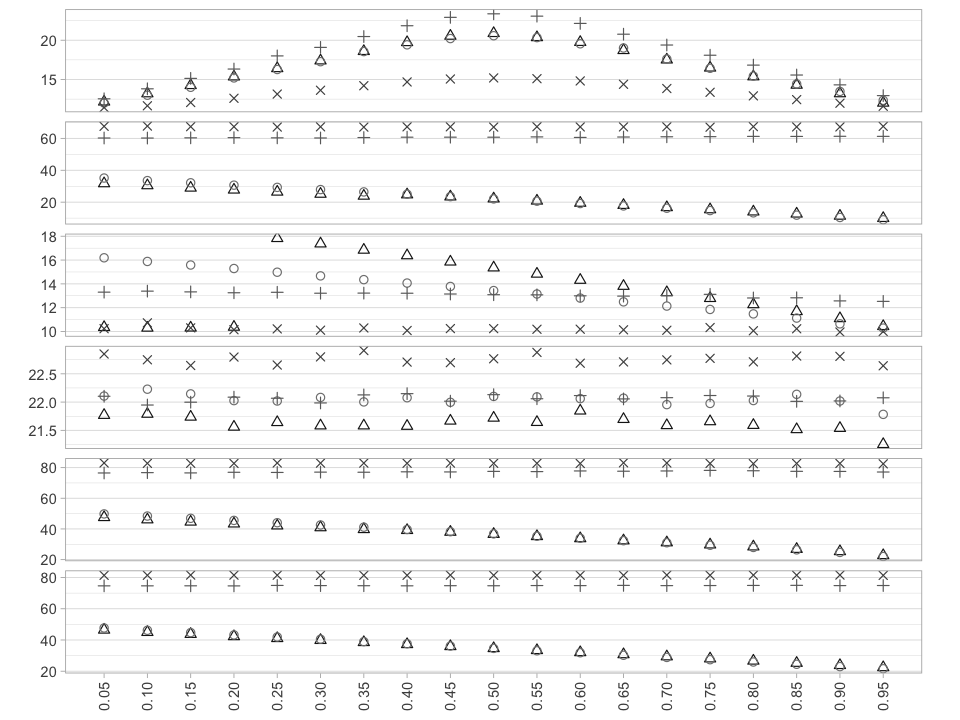

In [17]:
p + 
    geom_point(data = df2, aes(x = factor, y = mean, colour = strategy, shape = strategy), size = 2) +
    facet_grid(benchmark ~ ., scales="free_y") +
#     theme(axis.text.y=element_blank(), axis.ticks.y = element_blank()) +
    theme(strip.background = element_blank(), strip.text.x = element_blank()) +
#     theme(axis.text.x = element_text(angle = 90, vjust=0.5, hjust=1, size = 8)) +
    scale_shape_manual(values = c(1, 3, 4, 2)) + 
    theme(legend.position = 'none') +
    scale_color_grey(start = 0.5, end = .1) +
    scale_x_continuous(breaks = seq(0.05, 0.95, by=0.05)) +
    ylab('') +
    ggsave('rq6.pdf', device = 'pdf', width = 4, height = 6)